## OBJECTIVE

Text Classification: 

Build a text classification model to classify an email as spam or not without using llms or any transformer based model but use a machine learning classification algorithm after vectorising the text data. Submit your code along with a document explaining what approach you took and why? Attached is spam.csv file containing data for this

In [1]:
# Importing required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import joblib

from sklearn.metrics import classification_report

## Data Explorartion

In [2]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/spam-csv/spam.csv')
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe(include='object')

,label,text
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


## Data Visualization

label
ham     4825
spam     747
Name: count, dtype: int64


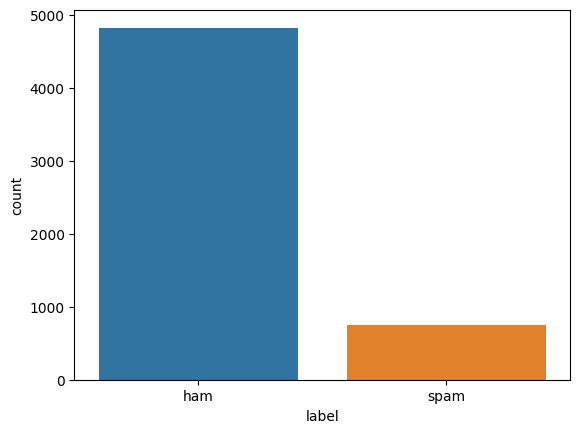

In [5]:
#Visualzing the class labels
sns.countplot(df,x='label')
print(df['label'].value_counts())

## Data Cleaning

In [6]:
def clean_text(mail):
    #Remove the punctuation
    without_punctuation = ''.join(char for char in mail if char not in string.punctuation)
    #Remove the stopwords
    result = ' '.join(word for word in  without_punctuation.split() if word.lower() not in set(stopwords.words('english')))
    
    return result

df['text'] = df['text'].apply(clean_text)
df['text']

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: text, Length: 5572, dtype: object

## Feature Encoding

In [7]:
# Ecoding the label feature
saved_encoder = {}
label_encoder = LabelEncoder()
label_encoder.fit(df['label'])
saved_encoder[df['label'].name] = label_encoder
df['label'] = label_encoder.transform(df['label'])

print([(index, label) for index, label in enumerate(label_encoder.classes_)])
df

[(0, 'ham'), (1, 'spam')]


,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u U å£750 Pound prize...
5568,0,Ì b going esplanade fr home
5569,0,Pity mood Soany suggestions
5570,0,guy bitching acted like id interested buying s...


## Spliting the Data, Vectorizing and Resampling

In [8]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Since there is class imbalance between Spam vs Ham, resampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Model Training, Saving and Evaluation

In [9]:
algorithms =  [LogisticRegression(),MultinomialNB(),SVC(),BernoulliNB(),KNeighborsClassifier(),DecisionTreeClassifier()]

for algorithm in algorithms:
    model = algorithm
    model.fit(X_train_resampled,y_train_resampled)
    joblib.dump(model,'model_'+ f'{model}' + '.pkl')
    
    print(f'classification report for {str(algorithm)}')
    print(classification_report(algorithm.predict(X_test),y_test))
    print('\n')

classification report for LogisticRegression()
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1593
           1       0.90      0.92      0.91       246

    accuracy                           0.98      1839
   macro avg       0.94      0.95      0.95      1839
weighted avg       0.98      0.98      0.98      1839



classification report for MultinomialNB()
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1559
           1       0.94      0.84      0.89       280

    accuracy                           0.97      1839
   macro avg       0.95      0.92      0.93      1839
weighted avg       0.97      0.97      0.97      1839



classification report for SVC()
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1623
           1       0.84      0.98      0.91       216

    accuracy                           0.98      1839
   

### BEST PERFORMING MODEL

#### BernoulliNB is the best performing since it has a better performance in terms of both recall and F1-score. 